In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
customers=pd.read_csv("D:\School\Minor Project\Codes\customers.csv")

In [3]:
customers.head()

Age Gender  Dependent_count Education_Level Marital_Status Income_Category
0   45      M                3     High School        Married     $60K - $80K
1   49      F                5        Graduate         Single  Less than $40K
2   51      M                3        Graduate        Married    $80K - $120K
3   40      M                3      Uneducated        Married     $60K - $80K
4   44      M                2        Graduate        Married     $40K - $60K

In [4]:
customers2 = customers.copy()
scaler = preprocessing.MinMaxScaler()
customers2[['Age','Dependent_count']] = scaler.fit_transform(customers[['Age','Dependent_count']])

In [5]:
customers2=customers2.to_numpy()

In [6]:
#clustering
kproto = KPrototypes(n_jobs=-1,n_clusters=3, init='Cao')
clusters = kproto.fit_predict(customers2, categorical=[1,3,4,5])

In [7]:
labeledCustomers=customers.copy()
labeledCustomers["cluster"]=clusters

In [8]:
labeledCustomers["cluster"].value_counts()

0    4019
2    3119
1    2240
Name: cluster, dtype: int64

In [9]:
labeledCustomers.head()

Age Gender  Dependent_count Education_Level Marital_Status Income_Category  \
0   45      M                3     High School        Married     $60K - $80K   
1   49      F                5        Graduate         Single  Less than $40K   
2   51      M                3        Graduate        Married    $80K - $120K   
3   40      M                3      Uneducated        Married     $60K - $80K   
4   44      M                2        Graduate        Married     $40K - $60K   

   cluster  
0        2  
1        0  
2        2  
3        2  
4        2

In [10]:
# saving the labeled data
labeledCustomers.to_csv("D:\School\Minor Project\Codes\Labeledcustomers.csv",index=False)

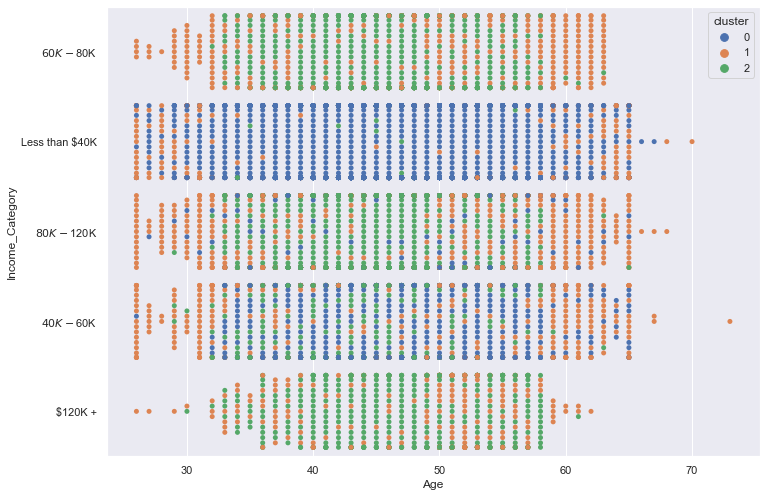

In [19]:
# visualising the clusters
sns.set(rc={'figure.figsize':(11.7,8.27)})
snsIncome=sns.swarmplot(x="Age",y="Income_Category",hue="cluster",data=labeledCustomers)

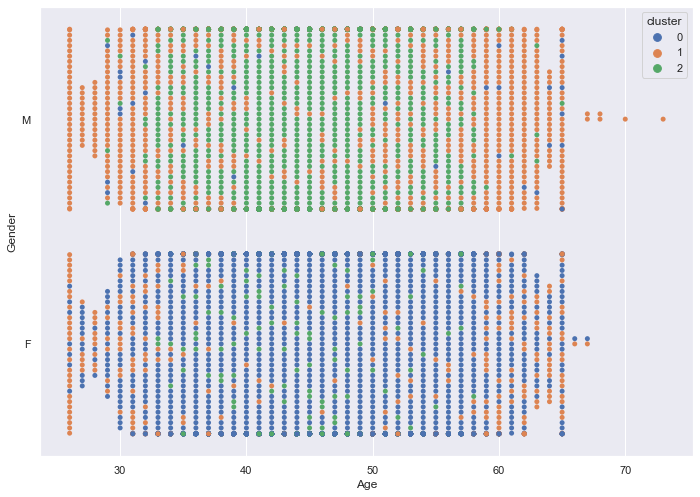

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
snsGender=sns.swarmplot(x="Age",y="Gender",hue="cluster",data=labeledCustomers)

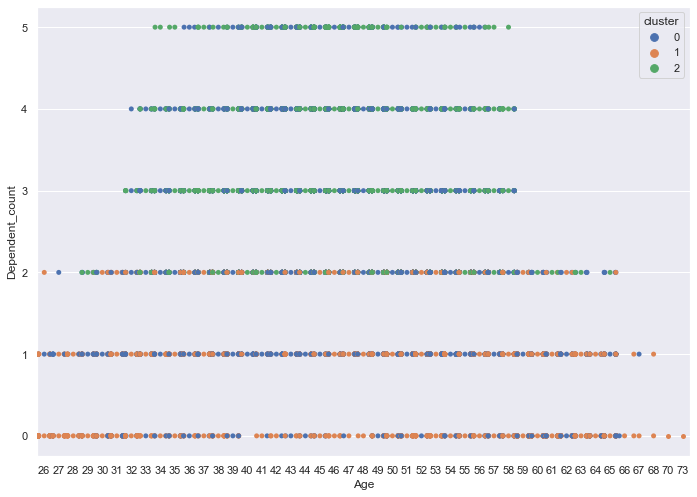

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
snsDep=sns.swarmplot(x="Age",y="Dependent_count",hue="cluster",data=labeledCustomers)

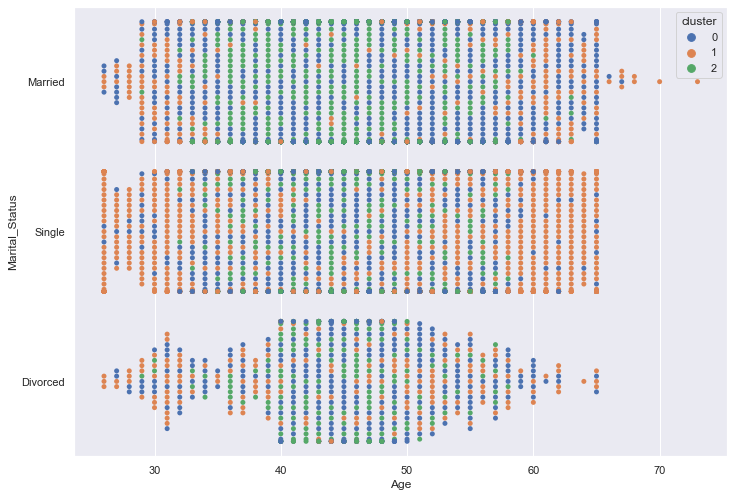

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
snsMarital=sns.swarmplot(x="Age",y="Marital_Status",hue="cluster",data=labeledCustomers)

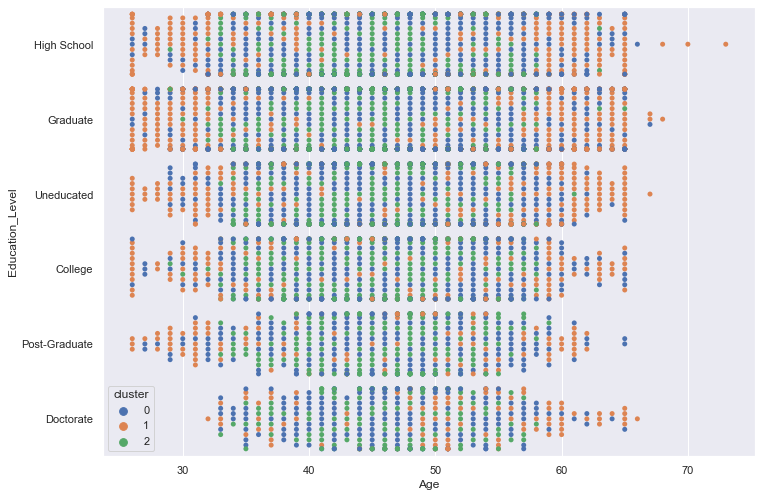

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
snsEdu=sns.swarmplot(x="Age",y="Education_Level",hue="cluster",data=labeledCustomers)

<AxesSubplot:xlabel='cluster', ylabel='Dependent_count'>

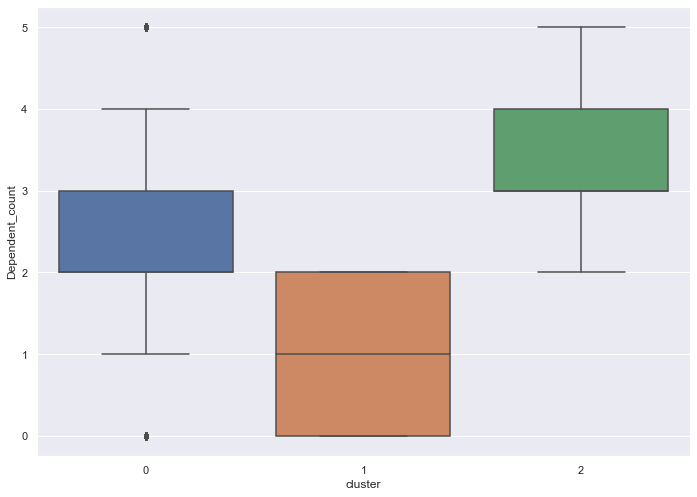

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(labeledCustomers.cluster,labeledCustomers.Dependent_count)

In [18]:
# saving the kproto object
pickle_out=open("kproto.pickle","wb")
pickle.dump(kproto,pickle_out)

In [37]:
# saving the sns plots
pickle_out=open("snsIncome.pickle","wb")
pickle.dump(snsIncome,pickle_out)

In [38]:
pickle_out=open("snsGender.pickle","wb")
pickle.dump(snsGender,pickle_out)

In [39]:
pickle_out=open("snsDep.pickle","wb")
pickle.dump(snsDep,pickle_out)

In [40]:
pickle_out=open("snsEdu.pickle","wb")
pickle.dump(snsEdu,pickle_out)

In [41]:
pickle_out=open("snsMarital.pickle","wb")
pickle.dump(snsMarital,pickle_out)